In [2]:
# !pip install numpy
import pandas as pd
from prophet import Prophet


In [6]:
d = pd.read_csv('seattle-weather.csv')

In [7]:
d1 = pd.DataFrame(d, columns=['date','precipitation'])

In [8]:
d1.head()

,date,precipitation
0,2012-01-01,0.0
1,2012-01-02,10.9
2,2012-01-03,0.8
3,2012-01-04,20.3
4,2012-01-05,1.3


In [9]:
d1.tail()

,date,precipitation
1456,2015-12-27,8.6
1457,2015-12-28,1.5
1458,2015-12-29,0.0
1459,2015-12-30,0.0
1460,2015-12-31,0.0


In [10]:
d1.columns = ['ds','y']

In [11]:
d1.head()

,ds,y
0,2012-01-01,0.0
1,2012-01-02,10.9
2,2012-01-03,0.8
3,2012-01-04,20.3
4,2012-01-05,1.3


In [12]:
model_precipitation = Prophet()

In [13]:
d1.columns

Index(['ds', 'y'], dtype='object')

In [14]:
d1.head()

,ds,y
0,2012-01-01,0.0
1,2012-01-02,10.9
2,2012-01-03,0.8
3,2012-01-04,20.3
4,2012-01-05,1.3


In [15]:
model_precipitation.fit(d1)

19:36:39 - cmdstanpy - INFO - Chain [1] start processing
19:36:39 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
model_precipitation.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [17]:
future_dates_prec = model_precipitation.make_future_dataframe(periods=100)

In [18]:
prec_prediction = model_precipitation.predict(future_dates_prec)

In [19]:
prec_prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,3.161497,-4.338126,11.970575,3.161497,3.161497,0.460480,0.460480,0.460480,0.162767,0.162767,0.162767,0.297712,0.297712,0.297712,0.0,0.0,0.0,3.621977
1,2012-01-02,3.161076,-4.905472,10.889647,3.161076,3.161076,-0.156340,-0.156340,-0.156340,-0.366414,-0.366414,-0.366414,0.210074,0.210074,0.210074,0.0,0.0,0.0,3.004736
2,2012-01-03,3.160655,-4.769573,12.133459,3.160655,3.160655,0.014787,0.014787,0.014787,-0.123865,-0.123865,-0.123865,0.138652,0.138652,0.138652,0.0,0.0,0.0,3.175442
3,2012-01-04,3.160234,-4.959728,11.252827,3.160234,3.160234,-0.005873,-0.005873,-0.005873,-0.089943,-0.089943,-0.089943,0.084070,0.084070,0.084070,0.0,0.0,0.0,3.154361
4,2012-01-05,3.159813,-5.133206,12.004669,3.159813,3.159813,-0.057734,-0.057734,-0.057734,-0.104370,-0.104370,-0.104370,0.046636,0.046636,0.046636,0.0,0.0,0.0,3.102079


In [20]:
prec_prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1556,2016-04-05,3.545656,-5.414482,11.939180,3.538765,3.552542,-0.062170,-0.062170,-0.062170,-0.123865,-0.123865,-0.123865,0.061695,0.061695,0.061695,0.0,0.0,0.0,3.483486
1557,2016-04-06,3.546947,-4.739369,11.527719,3.539918,3.553942,-0.014807,-0.014807,-0.014807,-0.089943,-0.089943,-0.089943,0.075137,0.075137,0.075137,0.0,0.0,0.0,3.532141
1558,2016-04-07,3.548239,-4.819497,11.496004,3.541065,3.555352,-0.004123,-0.004123,-0.004123,-0.104370,-0.104370,-0.104370,0.100247,0.100247,0.100247,0.0,0.0,0.0,3.544116
1559,2016-04-08,3.549530,-4.588300,12.212034,3.542221,3.556745,0.306347,0.306347,0.306347,0.171039,0.171039,0.171039,0.135308,0.135308,0.135308,0.0,0.0,0.0,3.855877
1560,2016-04-09,3.550822,-4.649035,12.060019,3.543405,3.558145,0.529185,0.529185,0.529185,0.350786,0.350786,0.350786,0.178399,0.178399,0.178399,0.0,0.0,0.0,4.080007


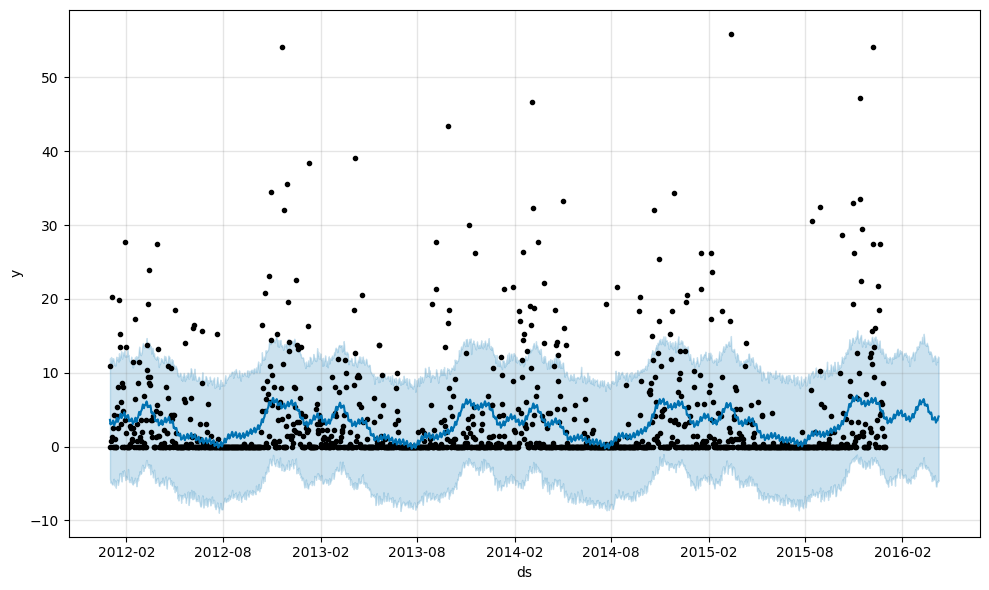

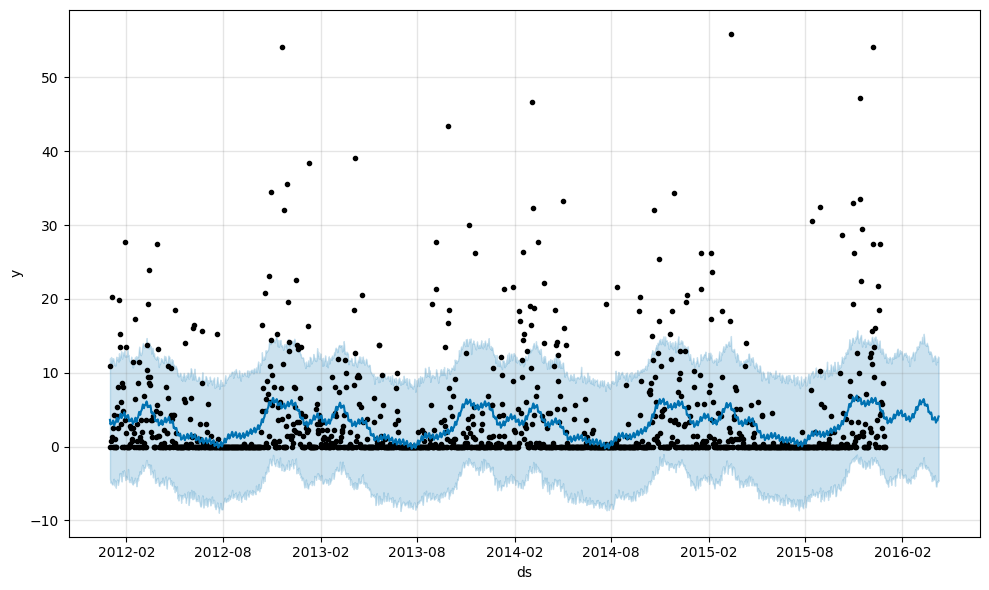

In [26]:
model_precipitation.plot(prec_prediction)